# Datathon Team 09

In [22]:
# Load packages
import os
import pandas as pd
import numpy as np
import pandas_profiling
import datetime
import matplotlib.dates as mdates
import requests

#Use of maps:
import folium

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

In [11]:
# Load the data into python
demographics_file = os.path.join(os.getcwd(),'Data/demographics.csv')        
geographic_file = os.path.join(os.getcwd(),'Data/geographic.csv')
green_trips_file = os.path.join(os.getcwd(),'Data/green_trips_new_2.csv')
mta_trips_file = os.path.join(os.getcwd(),'Data/mta_trips.csv')        
uber_trips_2014_file = os.path.join(os.getcwd(),'Data/uber_trips_2014.csv')
uber_trips_2015_file = os.path.join(os.getcwd(),'Data/uber_trips_2015.csv')
weather_file = os.path.join(os.getcwd(),'Data/weather.csv')
yellow_trips_new_file = os.path.join(os.getcwd(),'Data/yellow_trips_new.csv')
zones_file = os.path.join(os.getcwd(),'Data/zones.csv')

In [12]:
print(zones_file)

C:\Users\Oscar Garavito\Documents\DS4A_Datathon\Data/zones.csv


In [13]:
# Generate Data frames
demographics_df = pd.read_csv(demographics_file)
geographic_df = pd.read_csv(geographic_file)
green_trips_df = pd.read_csv(green_trips_file)
mta_trips_df = pd.read_csv(mta_trips_file)
uber_trips_2014_df = pd.read_csv(uber_trips_2014_file)
uber_trips_2015_df = pd.read_csv(uber_trips_2015_file)
weather_df = pd.read_csv(weather_file)
yellow_trips_df = pd.read_csv(yellow_trips_new_file)
zones_df = pd.read_csv(zones_file)

C:\Users\Oscar Garavito\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
# Data Profile
demographicsProfile = pandas_profiling.ProfileReport(demographics_df)
demographicsProfile.to_file(outputfile="./Profiles/demographicsProfile.html")

geographicProfile = pandas_profiling.ProfileReport(geographic_df)
geographicProfile.to_file(outputfile="./Profiles/geographicProfile.html")

green_tripsProfile = pandas_profiling.ProfileReport(green_trips_df)
green_tripsProfile.to_file(outputfile="./Profiles/green_tripsProfile.html")

mta_tripsProfile = pandas_profiling.ProfileReport(mta_trips_df)
mta_tripsProfile.to_file(outputfile="./Profiles/mta_tripsProfile.html")

uber_trips_2014Profile = pandas_profiling.ProfileReport(uber_trips_2014_df)
uber_trips_2014Profile.to_file(outputfile="./Profiles/uber_trips_2014Profile.html")

uber_trips_2015Profile = pandas_profiling.ProfileReport(uber_trips_2015_df)
uber_trips_2015Profile.to_file(outputfile="./Profiles/uber_trips_2015Profile.html")

weatherProfile = pandas_profiling.ProfileReport(weather_df)
weatherProfile.to_file(outputfile="./Profiles/weatherProfile.html")

yellow_tripsProfile = pandas_profiling.ProfileReport(yellow_trips_df)
yellow_tripsProfile.to_file(outputfile="./Profiles/yellow_tripsProfile.html")

zonesProfile = pandas_profiling.ProfileReport(zones_df)
zonesProfile.to_file(outputfile="./Profiles/zonesProfile.html")

# Yellow Trips Dataset

In [23]:
yellow_trips_df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5


In [30]:
yellow_trips_df.dtypes

pickup_datetime      datetime64[ns]
dropoff_datetime             object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
trip_distance               float64
total_amount                float64
YYYY_MM              datetime64[ns]
dtype: object

C:\Users\Oscar Garavito\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


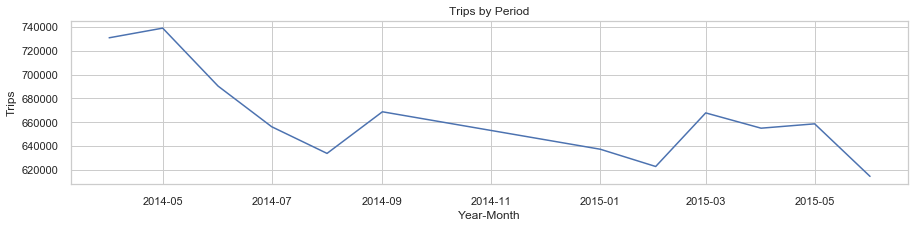

In [29]:
fig, ax = plt.subplots(figsize=(15,3))
yellow_trips_df['pickup_datetime'] = pd.to_datetime(yellow_trips_df['pickup_datetime'])
yellow_trips_df['YYYY_MM'] = yellow_trips_df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(str(x.year) + '-' + str(x.month), "%Y-%m"))
sns.lineplot(data=yellow_trips_df.groupby('YYYY_MM')['YYYY_MM'].count(), ax=ax)
plt.title('Trips by Period')
plt.xlabel('Year-Month')
plt.ylabel('Trips');

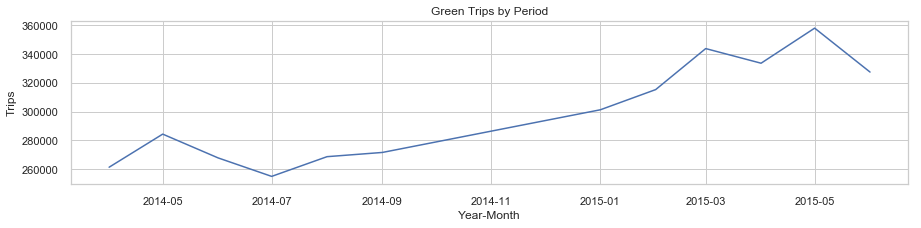

In [32]:
fig, ax = plt.subplots(figsize=(15,3))
green_trips_df['pickup_datetime'] = pd.to_datetime(green_trips_df['pickup_datetime'])
green_trips_df['YYYY_MM'] = green_trips_df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(str(x.year) + '-' + str(x.month), "%Y-%m"))
sns.lineplot(data=green_trips_df.groupby('YYYY_MM')['YYYY_MM'].count(), ax=ax)
plt.title('Green Trips by Period')
plt.xlabel('Year-Month')
plt.ylabel('Trips');

In [36]:
#mta_trips_df.head()

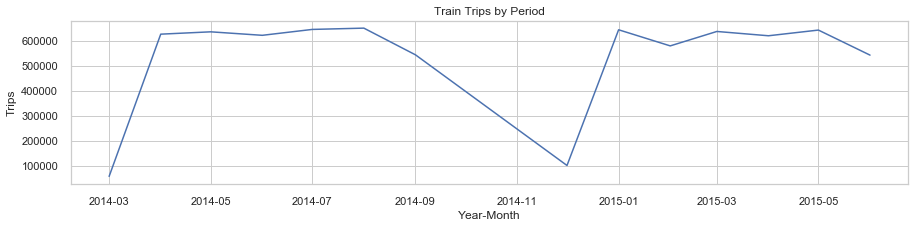

In [35]:
fig, ax = plt.subplots(figsize=(15,3))
mta_trips_df['datetime'] = pd.to_datetime(mta_trips_df['datetime'])
mta_trips_df['YYYY_MM'] = mta_trips_df['datetime'].apply(lambda x: datetime.datetime.strptime(str(x.year) + '-' + str(x.month), "%Y-%m"))
sns.lineplot(data=mta_trips_df.groupby('YYYY_MM')['YYYY_MM'].count(), ax=ax)
plt.title('Train Trips by Period')
plt.xlabel('Year-Month')
plt.ylabel('Trips');

In [41]:
uber_trips_2014_df['pickup_datetime'] = pd.to_datetime(uber_trips_2014_df['pickup_datetime'])
uber_trips_2014_df['YYYY_MM'] = uber_trips_2014_df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(str(x.year) + '-' + str(x.month), "%Y-%m"))
uber_trips_2014_df.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,YYYY_MM
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01


In [43]:
uber_trips_2015_df['pickup_datetime'] = pd.to_datetime(uber_trips_2015_df['pickup_datetime'])
uber_trips_2015_df['YYYY_MM'] = uber_trips_2015_df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(str(x.year) + '-' + str(x.month), "%Y-%m"))
uber_trips_2015_df.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,YYYY_MM
0,2015-05-17 09:47:00,141,B02617,B02617,2015-05-01
1,2015-05-17 09:47:00,65,B02617,B02617,2015-05-01
2,2015-05-17 09:47:00,100,B02617,B02617,2015-05-01
3,2015-05-17 09:47:00,80,B02617,B02774,2015-05-01
4,2015-05-17 09:47:00,90,B02617,B02617,2015-05-01


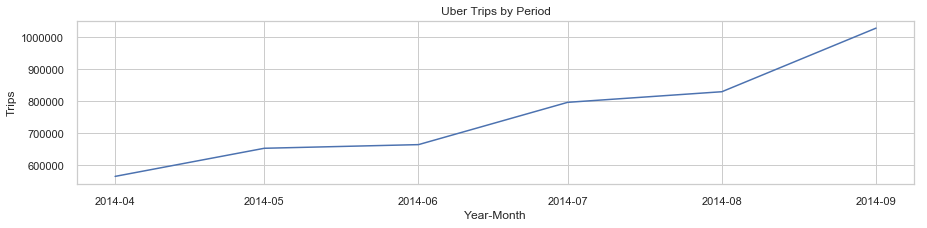

In [44]:
fig, ax = plt.subplots(figsize=(15,3))
sns.lineplot(data=uber_trips_2014_df.groupby('YYYY_MM')['YYYY_MM'].count(), ax=ax)
plt.title('Uber Trips by Period')
plt.xlabel('Year-Month')
plt.ylabel('Trips');

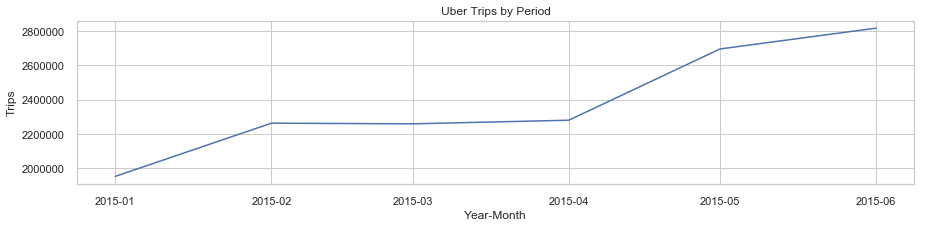

In [45]:
fig, ax = plt.subplots(figsize=(15,3))
sns.lineplot(data=uber_trips_2015_df.groupby('YYYY_MM')['YYYY_MM'].count(), ax=ax)
plt.title('Uber Trips by Period')
plt.xlabel('Year-Month')
plt.ylabel('Trips');

In [58]:
uberTemp1 = uber_trips_2014_df[['pickup_datetime','base','YYYY_MM']]
uberTemp2 = uber_trips_2015_df[['pickup_datetime','affiliate_base','YYYY_MM']]
uber_trips_df= pd.concat([uberTemp1, uberTemp2])
uber_trips_df.head()

C:\Users\Oscar Garavito\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,YYYY_MM,affiliate_base,base,pickup_datetime
0,2014-04-01,NaN,B02512,2014-04-01 00:11:00
1,2014-04-01,NaN,B02512,2014-04-01 00:17:00
2,2014-04-01,NaN,B02512,2014-04-01 00:21:00
3,2014-04-01,NaN,B02512,2014-04-01 00:28:00
4,2014-04-01,NaN,B02512,2014-04-01 00:33:00


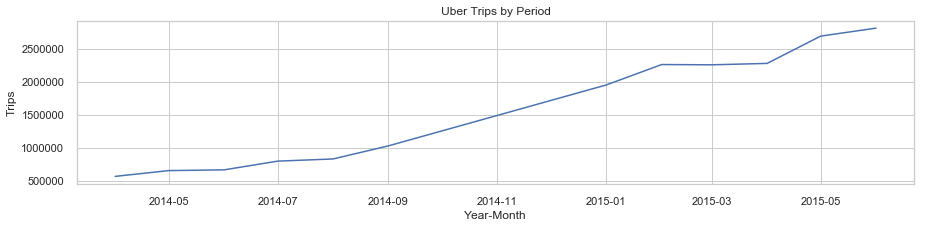

In [59]:
fig, ax = plt.subplots(figsize=(15,3))
sns.lineplot(data=uber_trips_df.groupby('YYYY_MM')['YYYY_MM'].count(), ax=ax)
plt.title('Uber Trips by Period')
plt.xlabel('Year-Month')
plt.ylabel('Trips');

In [60]:
yellow_trips_df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,YYYY_MM
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8,2014-04-01
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0,2014-04-01
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5,2014-04-01
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5,2014-05-01
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5,2014-05-01
